#

==========================================================================================

Tujuan : Project ini bertujuan untuk membantu seorang lulusan baru mendapatkan pekerjaan dengan gaji tahunan $45,000 dalam satu tahun, dengan meneliti pasar kerja yang relevan dan membuat portofolio dalam tiga bulan ke depan.

==========================================================================================

#

## LINK TABLEU

https://public.tableau.com/app/profile/permata.hajjarianti/viz/h8dsft_Milestone_Permata_Hajjarianti_Tableau/AnalisisDeskriptif?publish=yes


## IDENTIFIKASI MASALAH

#### <b>SMART FRAMEWORK</b>:

Spesifik: mendapatkan pekerjaan dengan gaji $45.000 per tahun

Measurable: memiliki gaji $45.000 pertahun setelah 1 tahun bekerja

Achievable: measurable dapat dicapai dengan mencari tahu mengenai negara, pekerjaan, serta minimal years of experiences yang dibutuhkan

Relevant: seorang fresh graduate dan harus mencari pekerjaan

Time-bound:
- dalam 3 bulan kedepan membuat portofolio
- mendapatkan pekerjaan dengan gaji $45.000 pertahun dalam waktu 1 tahun kedepan

#### <b>PROBLEM STATEMENT</b>:
Seorang fresh graduate yang sedang mencari pekerjaan dengan gaji minimal sebesar $45.000 per tahun. Hal yang perlu dilakukan adalah membuat portofolio untuk menarik calon perusahaan dan mencari pekerjaan dengan gaji $45.000 per tahun dalam waktu 1 tahun setelah memiliki pengalaman kerja kurang lebih 1 tahun di posisi pekerjaan yang relevan.

#### <b>PERTANYAAN 5W + 1H</b>:
1. Apa Saja Pekerjaan yang Memiliki Minimal Penghasilan $45.000 per Tahun?
2. Di Negara Mana Saja yang Memiliki Pekerjaan dengan Penghasilan Terbesar untuk Pengalaman Kerja 1 Tahun?
3. Berapa Tahun Pengalaman Kerja yang Dibutuhkan Untuk Mendapatkan Penghasilan Sebesar $45.000 per Tahun?
4. Apa 5 Pekerjaan yang Paling Banyak Dibutuhkan Di Negara-negara Maju dengan Penghasilan $45.000 per Tahun serta Pengalaman Kerja 1 Tahun?
5. Apakah Education Level Mempengaruhi Penghasilan Minimum $45000 dengan Pengalaman Kerja 1 Tahun?
6. Bagaimana Pemusatan dan Distribusi Data pada Kolom 'Salary' yang Memiliki Pengalaman Kerja 1 tahun?

## DATA LOADING

In [1]:
# Package-package yang dibutuhkan dalam mengolah data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import scipy.stats as stats

# Load data
df = pd.read_csv('Salary.csv')


## EXPLORASI DATA

### Referensi Data:

https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country/data

### Menampilkan info data

In [2]:
### Menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


Dapat dillihat dari informasi diatas bahwa dataframe memiliki 6684 data dengan 3 kolom jenis float, 4 kolom jeni object, dan 2 kolom jenis integer. Data diatas juga tidak memiliki null value.

In [3]:
## Menampilkan Nama Kolom
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

Dapat dilihat dari informasi diatas bahwa pada dataframe memiliki 8 kolom yaitu Age, Gender, Education Level, Job Title, Years of Experience, Salary, Country, Race, Senior.

Keterangan Kolom
- Age                   : Umur
- Gender                : Jenis Kelamin (Female = Perempuan dan Male = Laki-laki)
- Education Level       : Latar Belakang Pendidikan
    0 = Sekolah Menengah Atas
    1 = S1
    2 = S2
    3 = S3
- Job Title             : Jenis Pekerjaan
- Salary                : Penghasilan (US Dollar)
- Years of Experience   : Pengalaman Kerja (Tahun)
- Country               : Negara
- Senior                : Posisi Senior atau Bukan
    0 = Senior
    1 = Bukan Senior

## DATA CLEANING

### Missing Value

In [4]:
# Cek apakah terdapat null value
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

### Cek dan Menghapus Data Duplicate

In [5]:
# Cek apakah terdapat data duplicate
df.duplicated().any()

True

In [6]:
# Menghapus data duplicate
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
# Menampilkan jumlah data setelah data duplicate dihapus
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
5143,37.0,Male,1,Sales Representative,6.0,75000.0,Canada,Asian,0
5144,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
5145,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0
5146,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0


Dapat dilihat dari informasi diatas bahwa jumlah data setelah dilakukan penghapusan data duplicate yaitu sebanyak 5148, dimana jumlah awal sebelum data duplicate dihapus yaitu sebanyak 6684.

In [8]:
# Menyimpan data ke file csv baru
df.to_csv('Salary_Clean.csv', index=False)

### Data Type

In [10]:
# Menampilkan info tipe data sebelum dilakukannya perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5148 non-null   float64
 1   Gender               5148 non-null   object 
 2   Education Level      5148 non-null   int64  
 3   Job Title            5148 non-null   object 
 4   Years of Experience  5148 non-null   float64
 5   Salary               5148 non-null   float64
 6   Country              5148 non-null   object 
 7   Race                 5148 non-null   object 
 8   Senior               5148 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 362.1+ KB


Dapat dilihat pada data diatas dapat dilihat bahwa dataframe memiliki 3 kolom jenis float, 4 kolom jenis object, dan 2 kolom jenis integer. Pada kolom Age, Education Level, dan Years of Experience yang memiliki tipe data float akan diubah menjadi tipe data integer.

In [11]:
# Mengganti tipe data
df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)
df['Education Level'] = df['Education Level'].astype(int)


## ANALISIS DAN PERHITUNGAN

### 1. Apa Saja Pekerjaan yang Memiliki Minimal Penghasilan $45.000 per Tahun?

In [13]:
# Membuat dataframe baru yang berisikan hasil pengelompokkan kolom Job Title berdasarkan rata-rata penghasilan
df_1 = df.groupby(['Job Title']).agg({'Salary':'mean'}) # Mengelompokkan data berdasarkan kolom 'Job Title'

# Menampilkan data
df_1 

,Salary
Job Title,
Account Executive,95000.000000
Account Manager,71250.000000
Accountant,58333.333333
Administrative Assistant,50000.000000
Advertising Coordinator,45000.000000
...,...
UX Researcher,65000.000000
VP of Finance,200000.000000
VP of Operations,190000.000000


Dapat dilihat pada data diatas terdapat 129 jenis pekerjaan di dataset 'Salary.csv' ini, 129 jenis pekerjaan didapatkan dari hasil pengelompokkan jenis pekerjaan.

In [14]:
# Membuat dataframe baru yang berisikan hasil df_1 menyaring data nilai 'Salary' lebih besar atau sama dengan $45000
df1 = df_1[df_1['Salary'] >= 45000].sort_values('Salary', ascending=False).reset_index() # Filter data 'Salary' >= $4500 dan mengurutkannya dari besar ke kecil

# Membuat dataframe baru yang berisikan 4 pekerjaan yang memiliki penghasilan terbesar
df_top4 = df1[:4]

# Membuat dataframe baru berisikan penggabungan pekerjaan selain 4 pekerjaan yang memiliki penghasilan terbesar
df_other = df1.iloc[4:]
sum_other = df_other['Salary'].sum() # Menghitung total penghasilan pada df_other
other_row = {'Job Title': 'Other', 'Salary': sum_other} # Membuat dataframe dari dictionary

# Membuat dataframe baru hasil dari penggabungan df_top4 dan dataframe other_row
df_5_job = pd.concat([df_top4, pd.DataFrame([other_row])], ignore_index=True)
df_5_job.groupby(by='Job Title').sum() # Dataframe baru yg berisikan jumlah penghasilan untuk setiap jenis pekerjaan



,Salary
Job Title,
CEO,2.500000e+05
Chief Data Officer,2.200000e+05
Chief Technology Officer,2.500000e+05
Director of Data Science,2.040000e+05
Other,1.159682e+07


Dari data diatas dapat kita ketahui bahwa 4 pekerjaan yang memiliki rata-rata penghasilan diatas $45000 yaitu CEO, Chief data Officer, Chief Technology Officer, dan Director of Data Science.

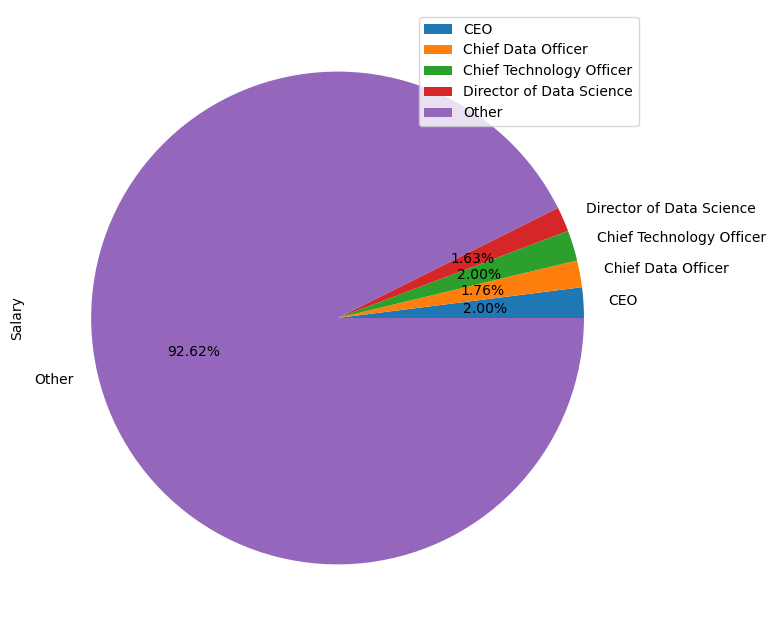

In [15]:
# Visualisasi data menggunakan pie chart
fig,ax1 = plt.subplots(figsize=(8,8))

df_5_job.groupby(by='Job Title').sum().plot(kind='pie', x='Job Title', y='Salary', xlabel='Job Title', autopct='%.2f%%',ax=ax1)
plt.show()

Pie chart diatas menjelaskan bahwa CEO dan Chief Technology Officer memiliki persentase sebesar 2%, Chief Data Officer sebesar 1,76%, Director of Data Science sebsar 1,63%, dan persentase terbesar yaitu 92,62% dimiliki oleh jenis pekerjaan selain CEO, Chief Technology Officer, Chief Data Officer, dan irector of Data Science (Other).

### 2. Di Negara Mana Saja yang Memiliki Pekerjaan dengan Penghasilan Terbesar untuk Pengalaman Kerja 1 Tahun?

In [16]:
# Membuat dataframe baru yang berisikan hasil filter berdasarkan tahun pengalaman kerja selama 1 tahun 
df2 = df[(df['Years of Experience'] == 1)].sort_values(by='Salary', ascending=False).reset_index(drop=True) # Mengurutkan kolom Salary dari yang terbesar ke kecil

# Menampilkan data
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,23,Male,3,Software Engineer Manager,1,119836.0,UK,Asian,0
1,23,Male,3,Software Engineer Manager,1,119836.0,UK,Welsh,0
2,24,Male,3,Software Engineer Manager,1,106686.0,Australia,Asian,0
3,24,Male,3,Software Engineer Manager,1,106686.0,USA,White,0
4,24,Male,3,Software Engineer Manager,1,106132.0,Australia,Asian,0
...,...,...,...,...,...,...,...,...,...
414,24,Male,0,Sales Associate,1,25000.0,Canada,Asian,0
415,28,Female,0,Sales Associate,1,25000.0,UK,White,0
416,23,Male,3,Software Engineer Manager,1,579.0,UK,Mixed,0
417,25,Female,1,Front end Developer,1,550.0,UK,Mixed,0


Hanya terdapat 419 data karena pada dataframe telah difilter berdasarkan requirement untuk mengerjakan soal 2

In [17]:
# Membuat dataframe baru yang berisikan hasil pengelompokkan kolom Country berdasarkan nilai maximum penghasilan pada kolom Salary 
df2 = df2.groupby(['Country']).agg({'Salary':'max'})

# Menampilkan data
df2

,Salary
Country,
Australia,106686.0
Canada,100000.0
China,100000.0
UK,119836.0
USA,106686.0


<Axes: xlabel='Country'>

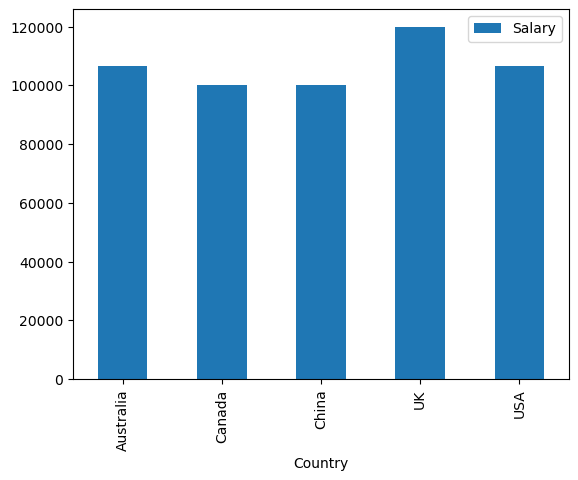

In [18]:
# Visualisasi data menggunakan bar chart
df2.plot(kind='bar')

Dari bar chart di atas diketahui bahwa negara yang memiliki penghasilan terbesar dengan minimal pengalaman kerja sebanyak 1 tahun ialah UK dengan penghasilan sebesar $119.836 per tahun, diikuti oleh negara Autralia dan USA dengan penghasilan sebesar $106.686, kemudian terakhir yaitu negara Canada dan China dengan penghasilan sebesar $100.000. Dan untuk kesimpulan, negara UK menjadi negara yang memiliki penghasilan paling besar.

### 3. Berapa Tahun Pengalaman Kerja yang Dibutuhkan Untuk Mendapatkan Penghasilan Sebesar $45.000 per Tahun?

In [19]:
# Membuat dataframe baru yang berisikan hasil filter berdasarkan besar penghasilan sebanyak $45000
df_3 = df[df['Salary'] == 45000][['Years of Experience', 'Salary']].reset_index(drop=True)

# Pengelompokkan tahun pengalaman kerja dan menjumlahkan total penghasilan dari kolom Years of Experience
df_3.groupby(['Years of Experience']).sum()

,Salary
Years of Experience,
1,810000.0
2,1215000.0
3,900000.0
5,90000.0
8,45000.0


Dapat dilihat dari data di atas bahwa untuk mendapatkan penghasilan $45000 per tahun diperlukan lama pengalaman kerja yang cukup bervariasi. Dari data diatas menunjukkan butuh 1 tahu, 2 tahun, 3 tahun, 5 tahun, atau bahkan 8 tahun pengalaman kerja untuk mendapatkan penghasilan $45000 per tahun.

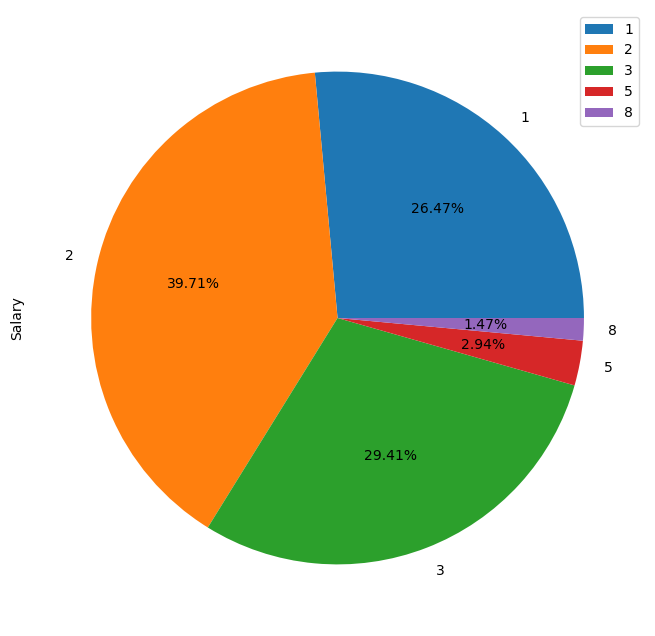

In [20]:
# Visualisasi data menggunakan pie chart
fig,ax1 = plt.subplots(figsize=(8,8))

df_3.groupby(['Years of Experience']).sum().plot(kind='pie', x='Years of Experience', y='Salary', xlabel='Years of Experience', autopct='%.2f%%',ax=ax1)
plt.show()

Pie chart diatas menjelaskan bahwa paling banyak pekerja yang mendapatkan penghasilan sebesar $45000 membutuhkan 2 tahun pengalaman kerja, adapun persentase dari banyaknya pekerja yang memiliki 2 tahun pengalaman kerja yaitu sebanyak 39.71%. Untuk 3 tahun pengalaman kerja memiliki persentase sebesar 29.41%, untuk 1 tahun pengalaman kerja memiliki persentase sebesar 26.47%, untuk 5 tahun pengalaman kerja memiliki persentase sebanyak 2.94%, dan untuk 8 tahun pengalaman kerja memiliki persentase sebanyak 1.47.

### 4. Apa Pekerjaan yang Paling Banyak Dibutuhkan Di Negara-negara Maju dengan Penghasilan $45.000 per Tahun serta Pengalaman Kerja 1 Tahun?

In [21]:
# Membuat dataframe baru berisikan hasil filter berdasarkan besar penghasilan yang lebih besar atau sama dengan $45000 dan tahun pengalaman kerja selama 1 tahun
df_4 = df[(df['Salary'] >= 45000) & (df['Years of Experience'] == 1)].sort_values(by='Job Title', ascending=False).reset_index() # Diurutkan dari besar ke kecil

# Membuat dataframe baru berisikan hasil jumlah frekuensi kemunculan nilai unik dari kolom Job Title
df4 = df_4['Job Title'].value_counts().nlargest(5) # Mengambil data 5 Teratas

# Menampilkan data
df4

Job Title
Software Engineer      56
Front end Developer    34
Data Analyst           32
Product Manager        22
Back end Developer     16
Name: count, dtype: int64

Dapat diketahui dari data di atas bahwa 5 pekerjaan yang paling banyak dibutuhkan dengan penghasilan $45000 dan pengalaman kerja selama 1 tahun yaitu sebagai berikut:
- Software Engineer: dengan jumlah frekuensi kemunculan pada data sebanyak 56 kali
- Front end Developer dengan jumlah frekuensi kemunculan pada data sebanyak 34 kali
- Data Analyst dengan jumlah frekuensi kemunculan pada data sebanyak 32 kali
- Product Manager dengan jumlah frekuensi kemunculan pada data sebanyak 22 kali
- Back end Developer dengan jumlah frekuensi kemunculan pada data sebanyak 16 kali

<Axes: ylabel='Job Title'>

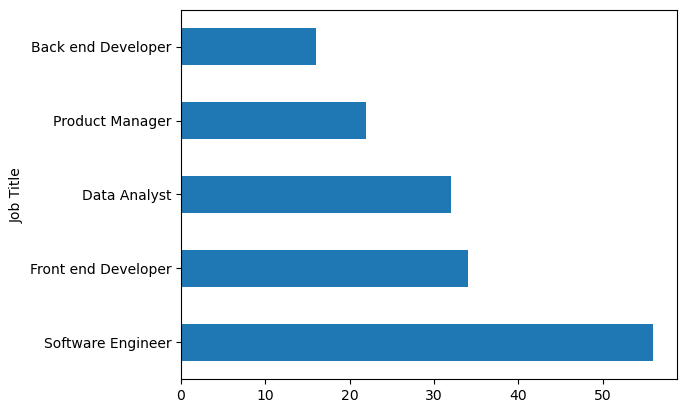

In [22]:
# Visualisasi menggunakan bar chart
df4.plot(kind='barh')

Dari bar chart diatas dapat dilihat bahwa 5 pekerjaan yang paling banyak dibutuhkan dengan penghasilan $45000 dan pengalaman kerja selama 1 tahun yaitu Software Engineer, Front end Developer, Data Analyst, Product Manager, dan Back end Developer. Jenis pekerjaan yang paling banyak dibutuhkan yaitu Software Engineer dan jenis pekerjaan yang paling sedikit dibutuhkan diantara 5 data teratas yaitu Back end Developer.

### 5. Apakah Education Level Mempengaruhi Penghasilan Minimum $45000 dengan Pengalaman Kerja 1 Tahun?

Analisa ini akan mencari apakah terdapat pengaruh education level dengan penghasilan minimum $45000 dan pengalaman 1 tahun kerja menggunakan annova test. Hipotesa dalam pengujian ini sebagai berikut:

- H0: Tidak terdapat hubungan antara education level dengan penghasilan minimum $45000 yang diperoleh

- H1: Terdapat hubungan antara education level dengan penghasilan minimum $45000 yang diperoleh

In [23]:
# Membuat dataframe baru berisikan hasil filter berdasarkan besar penghasilan yang lebih besar atau sama dengan $45000 dan tahun pengalaman kerja selama 1 tahun
df5 = df[(df['Salary'] >= 45000) & (df['Years of Experience'] == 1)].sort_values(by='Education Level').reset_index(drop=True) # Diurutkan dari besar ke kecil berdasarkan kolom Education level

# Menampilkan data
df5

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,23,Female,0,Back end Developer,1,52807.0,UK,White,0
1,23,Male,0,Front end Developer,1,47898.0,USA,African American,0
2,23,Female,0,Back end Developer,1,52807.0,Australia,White,0
3,24,Female,0,Project Engineer,1,52731.0,Canada,Black,1
4,26,Female,1,Software Engineer,1,45000.0,UK,Welsh,0
...,...,...,...,...,...,...,...,...,...
185,24,Male,3,Software Engineer Manager,1,106686.0,Australia,Asian,0
186,24,Male,3,Software Engineer Manager,1,106686.0,USA,White,0
187,23,Male,3,Software Engineer Manager,1,119836.0,UK,Welsh,0
188,23,Male,3,Software Engineer Manager,1,119836.0,UK,Asian,0


Hanya terdapat 190 data karena pada dataframe telah difilter berdasarkan requirement untuk mengerjakan soal 5

### Anova Test 

In [24]:
# Mengekstrak data penghasilan pada kolom Salary untuk setiap kategoori pada kolom Education Level
SMA = df5['Salary'][(df5['Education Level'] == 0)]
S1 = df5['Salary'][(df5['Education Level'] == 1)]
S2 = df5['Salary'][(df5['Education Level'] == 2)]
S3 = df5['Salary'][(df5['Education Level'] == 3)]

print(f'Average Salary of SMA : {SMA.mean():.2f}')
print(f'Average Salary of S1 : {S1.mean():.2f}')
print(f'Average Salary of S2 : {S2.mean():.2f}')
print(f'Average Salary of S3 : {S3.mean():.2f}')

Average Salary of SMA : 51560.75
Average Salary of S1 : 59081.99
Average Salary of S2 : 78888.89
Average Salary of S3 : 111835.20


In [25]:
# Hitung P-value hasil test Anova 
res = stats.f_oneway(S1, S2)
print('P-value:',res.pvalue)

P-value: 2.236858720615844e-07


Berdasarkan nilai P-value (P-value < 0.05) yang diperoleh dari test anova diatas, menunjukkan bahwa hipotesis nol (H0) ditolak atau hipotesis satu (H1) diterima, yang artinya terdapat hubungan antara education level dengan penghasilan minimum $45000 yang diperoleh.

### 6. Bagaimana Pemusatan dan Distribusi Data pada Kolom 'Salary' yang Memiliki Pengalaman Kerja 1 Tahun ?

In [26]:
# Membuat dataframe baru berisikan hasil filter berdasarkan tahun pengalaman kerja selama 1 tahun
df6 = df[(df['Years of Experience'] == 1)].reset_index(drop=True)

# Menampilkan data
df6

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,26,Female,1,Marketing Coordinator,1,45000.0,China,Chinese,0
1,24,Male,1,Developer,1,40000.0,Australia,Asian,0
2,26,Female,1,Customer Success Rep,1,40000.0,Canada,Asian,0
3,26,Male,1,Accountant,1,35000.0,Australia,Australian,0
4,26,Male,1,Software Developer,1,35000.0,China,White,0
...,...,...,...,...,...,...,...,...,...
414,26,Female,0,Sales Associate,1,35000.0,USA,African American,0
415,24,Male,1,Sales Executive,1,35000.0,Australia,Asian,0
416,26,Female,0,Sales Executive,1,35000.0,China,Chinese,0
417,24,Male,1,Sales Representative,1,35000.0,UK,Asian,0


Hanya terdapat 419 data karena pada dataframe telah difilter berdasarkan requirement untuk mengerjakan soal 6

### Perhitungan Central Tendency 

In [27]:
# Perhitungan nilai rata-rata, nilai tengah, dan nilai yang paling sering muncul pada data
print(f'Mean = {df6["Salary"].mean()}')
print(f'Median = {df6["Salary"].median()}')
print(f'Modus = {df6["Salary"].mode()[0]}')

Mean = 45239.29116945108
Median = 35000.0
Modus = 35000.0


Dari informasi diatas diketahui bahwa kolom Salary memiliki nilai rata-rata (mean) sebesar 45239.29116945108, nilai tengah (median) sebesar 35000 dan nilai modus sebesar 35000. Ini menggambarkan pemusatan datanya tidak simetris melainkan agak condong ke arah kanan dikarenakan nilai mean lebih besar dari median. Berikutnya akan dilakukan Normality test untuk mengetahui apakah data ini normal atau tidak.

### Normality Test - Skewness dan Kurtosis

In [28]:
# Perhitungan skewness dan kurtosis
print(f'Skewness = {df6["Salary"].skew()}') # skewness berfungsi untuk mencari tahu kesimetrisan suatu data
print(f'kurtosis = {df6["Salary"].kurt()}') # kurtosis berfungsi untuk mengetahui outlier dan mengukur bentuk ekor distribusi

Skewness = 1.3486127241910624
kurtosis = 1.8970986672770915


Nilai dari skewness lebih dari 1 yaitu sebesar 1.3486127241910624. Artinya data dari kolom Salary tergolong kategori 'highly skewed' dan memiliki kecondongan positive skew.

Sedangkan untuk kurtosis memiliki nilai lebih dari 0 yaitu sebesar 1.8970986672770915. Nilai menunjukkan data memiliki banyak outlier dan termasuk distribusi Leptokurtic. Untuk mengetahuinya diperlukan visualisasi / gambar untuk mengetahui ada atau tidaknya outlier.

<Axes: >

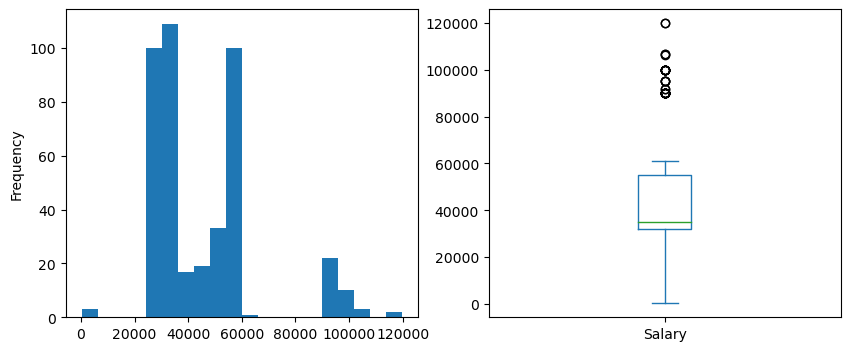

In [29]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df6['Salary'].plot(kind='hist',bins=20,ax=ax[0])
df6['Salary'].plot(kind='box',ax=ax[1])

Pada gambar visualisasi sebelah kanan (bar chart) menunjukkan bahwa data tidak simetris dan condong ke arah kanan, hal ini sesuai dengan perhitunga skewness di atas. Dan pada gambar visualisasi sebelah kiri (boxplot) menunjukkan bahwa data memiliki cukup banyak outlier di batas atas data dan ini sesuai dengan perhitungan kurtosis di atas.

### Handling Outlier

In [30]:
# Detect outlier pada data menggunakan Tukey's Rule
q1 = df6['Salary'].quantile(0.25)
q3 = df6['Salary'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 89500.00
Lower Boundary: -2500.00


Hasil dari perhitungan diatas dapat dilihat bahwa Lower Boundary bernilai negatif dan dapat kita abaikan karena tidak mungkin penghasilan/Salary memiliki nilai negatif. Dan perhitungan di atas menunjukkan bahwa nilai outlier berada di batas atas nilai data.

In [31]:
# Membuat variable baru dengan nama no_outlier yang berisi nilai yang tidak dianggap sebagai outlier berdasarkan batas bawah (low_bound) dan batas atas (up_bound)
no_outlier = df6['Salary'][(df6['Salary']>=low_bound) & (df6['Salary']<=up_bound)]
no_outlier

0      45000.0
1      40000.0
2      40000.0
3      35000.0
4      35000.0
        ...   
414    35000.0
415    35000.0
416    35000.0
417    35000.0
418    35000.0
Name: Salary, Length: 382, dtype: float64

Dapat dilihat bahwa jumlah data sebelum handling outlier sebanyak 419 data, sedangkan setelah dilakukan handling outlier data berjumlah 382.

## KESIMPULAN

- Dari hasil analisis data yang sudah dilakukan di atas, jawaban atas permasalah dimana jika seorang fresh graduate ingin mencari pekerjaan dengan penghasilan $45000 hanya dengan pengalaman kerja 1 tahun, dapat melamar kerja di bidang Software Engineer, Front end Developer, Data Analyst, Product Manager, atau Back end Developer.

- Setelah di analisis, pekerjaan yang memiliki minimal penghasilan $45000 per tahun dengan pengalaman kerja 1 tahun adalah CEO, Chief data Officer, Chief Technology Officer, dan Director of Data Science.

- Negara yang memiliki penghasilan terbesar dengan minimal pengalaman kerja sebanyak 1 tahun ialah UK. Negara UK dengan penghasilan sebesar $119.836 per tahun, diikuti oleh negara Autralia dan USA dengan penghasilan sebesar $106.686, kemudian terakhir yaitu negara Canada dan China dengan penghasilan sebesar $100.000.

- Berdasarkan hasil analisis data untuk mendapatkan penghasilan $45000 per tahun diperlukan lama pengalaman kerja yang cukup bervariasi yaitu 1 tahun, 2 tahun, 3 tahun, 5 tahun, atau bahkan 8 tahun pengalaman kerja.

- Hasil analisis menunjukkan bahwa 5 pekerjaan yang paling banyak dibutuhkan dengan penghasilan $45000 dan pengalaman kerja selama 1 tahun yaitu Software Engineer, Front end Developer, Data Analyst, Product Manager, dan Back end Developer. 

- Pada dataset ini dilakukan pengujian pada anova test untuk mengetahui apakah terdapat hubungan antara education level dengan penghasilan minimum $45000 yang diperoleh. Nilai P-value (P-value < 0.05) yang diperoleh dari test anova menunjukkan bahwa hipotesis nol (H0) ditolak yang artinya terdapat hubungan antara education level dengan penghasilan minimum $45000 yang diperoleh. 

- Data 'Salary' memiliki nilai mean sebesar 45239.29116945108, nilai median sebesar 35000 dan nilai modus sebesar 35000. Nilai mean lebih besar dari nilai median, hal ini menunjukkan bahwa pemusatan data tidak simetris dan condong ke arah kanan. Nilai skewness lebih dari 1 yaitu sebesar 1.3486127241910624, hal ini menunjukkan data tergolong kategori 'highly skewed' dan positive skew. Nilai kurtosis lebih dari 0 yaitu sebesar 1.8970986672770915, hal ini menunjukkan data memiliki banyak outlier dan termasuk distribusi Leptokurtic. 